In [ ]:
# [구현 1: 네이버 API 뉴스 검색 결과 워드 클라우드 작성]
# 참고 파일 : test2han.ipynb
#  1) 네이버 뉴스 수집 시스템 활용하기
# 2) 네이버 오픈 API 사용하여 1000건의 정보 검색을 수행하라.
# 3) 검색된 정보에서 내용(description)을 추출하여 하나의 문자열로 결합한다.
#  3) 문자열로 결합된 데이터로부터 konlpy 형태소 분석기로 명사를 추출한다.
#  4) 추출한 명사의 출현 빈도수를 구한다.
#  5) 추출된 명사 중 글자 문자, 숫자가 아닌 것은 제거하라.
#  6) 명사의 출현 빈도를 활용하여 wordcloud를 작성한다.
# 7) wordcloud 작성시 이미지를 사용하여 모양설정을 한다(예 마네킹 모양)

In [6]:
import json
import re
import time

import requests
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import numpy as np
from PIL import Image
from os import path

In [18]:
CLIENT_ID="my client id"
CLIENT_SECRET="my client secret"
SEARCH_QUERY="해외축구"
DISPLAY_COUNT=100
MAX_RESULTS=1000
URL="https://openapi.naver.com/v1/search/news.json"

In [19]:
headers = {
    "X-Naver-Client-Id": CLIENT_ID,
    "X-Naver-Client-Secret": CLIENT_SECRET
}

In [20]:
news_list=[]

In [21]:
for start in range(1, MAX_RESULTS, DISPLAY_COUNT):
    params = {
        "query": SEARCH_QUERY,
        "display": DISPLAY_COUNT,
        "start": start,
        "sort": "date"
    }

    response = requests.get(URL, headers=headers, params=params)

    if response.status_code == 200:
        data = response.json()
        news_list.extend(data.get("items", []))
        print(f"{len(news_list)}개 뉴스 수집 완료...")
    else:
        print(f"오류 발생: {response.status_code}")
        break

    time.sleep(1)

print(f"\n 총 {len(news_list)}개의 뉴스 데이터 수집 완료!")

100개 뉴스 수집 완료...
200개 뉴스 수집 완료...
300개 뉴스 수집 완료...
400개 뉴스 수집 완료...
500개 뉴스 수집 완료...
600개 뉴스 수집 완료...
700개 뉴스 수집 완료...
800개 뉴스 수집 완료...
900개 뉴스 수집 완료...
1000개 뉴스 수집 완료...

 총 1000개의 뉴스 데이터 수집 완료!


In [22]:
outputFileName = "./해외축구_naver_news.json"
with open(outputFileName, "w", encoding="utf-8") as f:
    json.dump(news_list, f, ensure_ascii=False, indent=4)
print("뉴스 데이터 JSON 파일 저장 완료!\n")

뉴스 데이터 JSON 파일 저장 완료!



In [27]:
inputFileName = "./해외축구_naver_news.json"
data = json.loads(open(inputFileName, "r", encoding="utf-8").read())
print(f"뉴스 데이터 개수: {len(data)}개")
print(data[:2])

뉴스 데이터 개수: 1000개
[{'title': '&quot;매혹적&quot;→&quot;처참해&quot; 양민혁, 기회 계속 받는데! 동료 윙어도 부상...리즈...', 'originallink': 'https://www.mhnse.com/news/articleView.html?idxno=376344', 'link': 'https://m.sports.naver.com/wfootball/article/445/0000278541', 'description': '프로<b>축구</b> 챔피언십 37라운드에서 미들즈브러에 1-2로 패했다. 4연패를 당한 QPR은 11승11무15패, 승점 44점으로... 하지만 <b>해외</b> 무대 경험이 없었던 양민혁은 토트넘에서 기회를 받지 못했다. 지난해 12월 런던에 조기... ', 'pubDate': 'Thu, 13 Mar 2025 10:00:00 +0900'}, {'title': '풍자 &quot;성전환 후 제일 먼저 한 일, 노팬티로 레깅스 입기…한시간 동안...', 'originallink': 'https://www.news1.kr/entertain/celebrity-topic/5717711', 'link': 'https://m.entertain.naver.com/article/421/0008127237', 'description': '난 <b>축구</b>보다 공기놀이를 좋아했다&quot;고 말했다. 이어 &quot;15세 때 남자를 좋아하지만, 내가 남자인 상태로 남자를... 너무 긴장한 탓에 혈압과 심전도가 난리가 났다&quot;며 &quot;우리나라는 혈압 낮추는 약을 주고 그러는데, <b>해외</b>에서는... ', 'pubDate': 'Thu, 13 Mar 2025 09:55:00 +0900'}]


In [28]:
message = ""
for item in data:
    if "description" in item.keys():
        message = message + re.sub(r"[^\w]", " ", item["description"]) + " "
print("뉴스 내용 일부:", message[:200])

뉴스 내용 일부: 프로 b 축구  b  챔피언십 37라운드에서 미들즈브러에 1 2로 패했다  4연패를 당한 QPR은 11승11무15패  승점 44점으로    하지만  b 해외  b  무대 경험이 없었던 양민혁은 토트넘에서 기회를 받지 못했다  지난해 12월 런던에 조기     난  b 축구  b 보다 공기놀이를 좋아했다 quot 고 말했다  이어  quot 15세 때 남자를


In [29]:
nlp = Okt()
message_N = nlp.nouns(message)
print(f"명사 추출 결과: {message_N[:10]}")

명사 추출 결과: ['프로', '축구', '챔피언십', '라운드', '미들즈브러', '로', '패', '연패', '당한', '은']


In [31]:
count = Counter(message_N)
print(f"명사 빈도수: {count.most_common(10)}")

명사 빈도수: [('축구', 1184), ('해외', 1042), ('선수', 386), ('등', 381), ('한국', 243), ('리그', 199), ('개', 194), ('진출', 185), ('수', 172), ('프로', 171)]


In [32]:
word_count = dict()
for tag, counts in count.most_common(80):
    if len(str(tag)) > 1:
        word_count[tag] = counts
print(f"상위 80개 명사: {word_count}")

상위 80개 명사: {'축구': 1184, '해외': 1042, '선수': 386, '한국': 243, '리그': 199, '진출': 185, '프로': 171, '감독': 155, '경기': 127, '센터': 127, '국가대표': 123, '국내': 118, '유럽': 117, '연맹': 104, '이강인': 99, '시장': 94, '문화': 93, '물류': 91, '또한': 85, '제작': 84, '마련': 83, '기술': 82, '이번': 80, '메시지': 80, '스포츠': 79, '목소리': 79, '대표팀': 79, '지원': 75, '첨단': 74, '움직임': 74, '결합': 74, '웰컴': 74, '공간': 72, '최적화': 72, '관람객': 71, '테마': 71, '회장': 70, '지난': 70, '컬처': 70, '경기장': 69, '대회': 69, '월드컵': 68, '나볼': 68, '기업': 67, '구단': 65, '일본': 64, '담당': 63, '여자': 61, '베트남': 61, '통해': 59, '잔디': 58, '크기': 58, '국제': 55, '글로벌': 55, '미국': 54, '손흥민': 54, '지난해': 53, '국가대표팀': 53, '협회': 52, '개최': 52, '남양주': 50, '사업': 49, '이후': 49, '서울': 47}


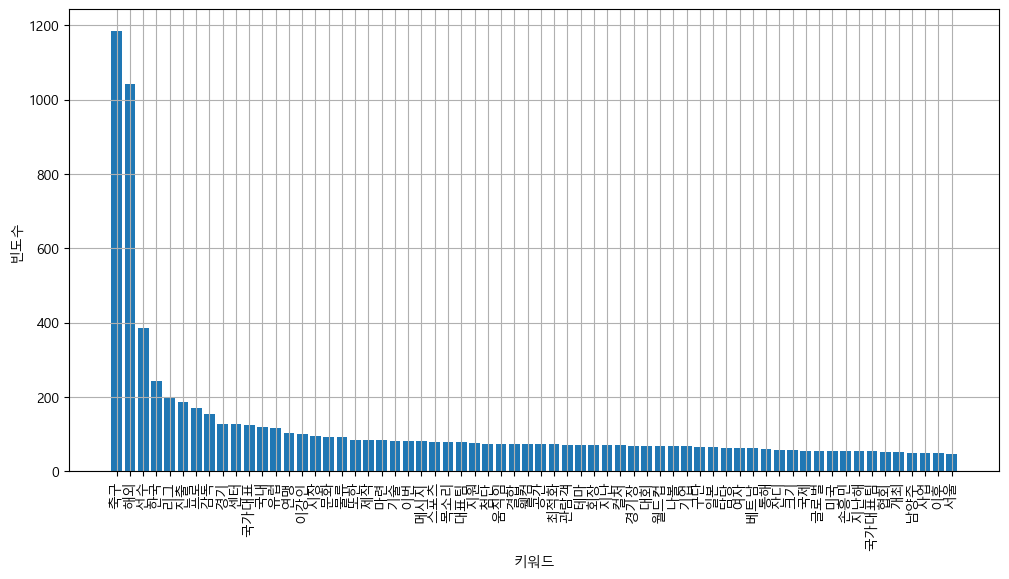

In [33]:
font_path = "c:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family = font_name)

plt.figure(figsize=(12, 6))
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(sorted_Values)), sorted_Values, align="center")
plt.xticks(range(len(sorted_Values)), list(sorted_Keys), rotation="vertical")

plt.show()

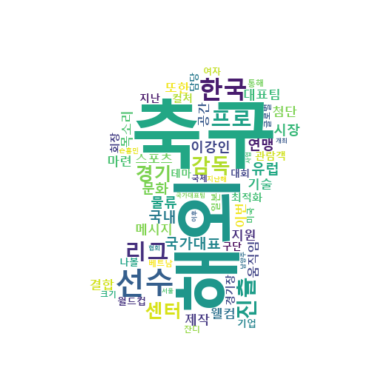

In [35]:
dog_mask = np.array(Image.open("dog_image1.png"))

wc = WordCloud(font_path, background_color="white", max_words=1000, mask=dog_mask, width=800, height=1000)
sampleImage = wc.generate_from_frequencies(word_count)

plt.imshow(sampleImage, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
sampleImage.to_file(inputFileName + "_cloud.jpg")
print(f"워드 클라우드 이미지를 저장했습니다: {inputFileName}_cloud.jpg")

워드 클라우드 이미지를 저장했습니다: ./해외축구_naver_news.json_cloud.jpg
